In [50]:
# NAIVE BAYES: supervised classification algorithm. uses ayes theorem for classification.
# 3 types of naive bayes:
#     - gaussian naive bayes(assumption : dataset is normal distribution) - mostly used
#     - bernoulli - used for binary classification
#     - multi nomial

In [ ]:
# here we will discuss gaussian naive bayes

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [52]:
df = pd.read_csv("nasa.csv")
pd.set_option('display.max_columns', None) # to display all the columns
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [53]:
df.shape

(4687, 40)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [55]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [56]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [57]:
df[['Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour']]

,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour
0,6.115834,22017.003799,13680.509944
1,18.113985,65210.346095,40519.173105
2,7.590711,27326.560182,16979.661798
3,11.173874,40225.948191,24994.839864
4,9.840831,35426.991794,22012.954985
...,...,...,...
4682,22.154265,79755.354273,49556.875548
4683,3.225150,11610.539577,7214.337772
4684,7.191642,25889.910626,16086.983633
4685,11.352090,40867.522309,25393.489071


In [58]:
df.drop(['Est Dia in M(min)', 'Est Dia in M(max)','Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Neo Reference ID', 'Name'], axis=1, inplace = True) 

# here we don't need 'Neo Reference ID', 'Name'.
# features 'Est Dia in KM(min)','Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)','Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)' all have same data but in different scales so we keep any 2 and drop the rest.
# features 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(kilometers)', 'Miss Dist.(miles)' all have same data but in different scales so we keep any one and drop the rest
# features 'Relative Velocity km per sec','Relative Velocity km per hr', 'Miles per hour', all have same data but in different scales so we keep any one and drop the rest.

In [59]:
# we also drop 'Orbiting Body' and 'Equinox' features as both of them contains same values.
df.drop(['Orbiting Body' , 'Equinox'], axis = 1, inplace = True)

In [60]:
df[['Orbit Determination Date', 'Close Approach Date']] = df[['Orbit Determination Date', 'Close Approach Date']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Absolute Magnitude           4687 non-null   float64       
 1   Est Dia in KM(min)           4687 non-null   float64       
 2   Est Dia in KM(max)           4687 non-null   float64       
 3   Close Approach Date          4687 non-null   datetime64[ns]
 4   Epoch Date Close Approach    4687 non-null   int64         
 5   Relative Velocity km per hr  4687 non-null   float64       
 6   Miss Dist.(kilometers)       4687 non-null   float64       
 7   Orbit ID                     4687 non-null   int64         
 8   Orbit Determination Date     4687 non-null   datetime64[ns]
 9   Orbit Uncertainity           4687 non-null   int64         
 10  Minimum Orbit Intersection   4687 non-null   float64       
 11  Jupiter Tisserand Invariant  4687 non-null 

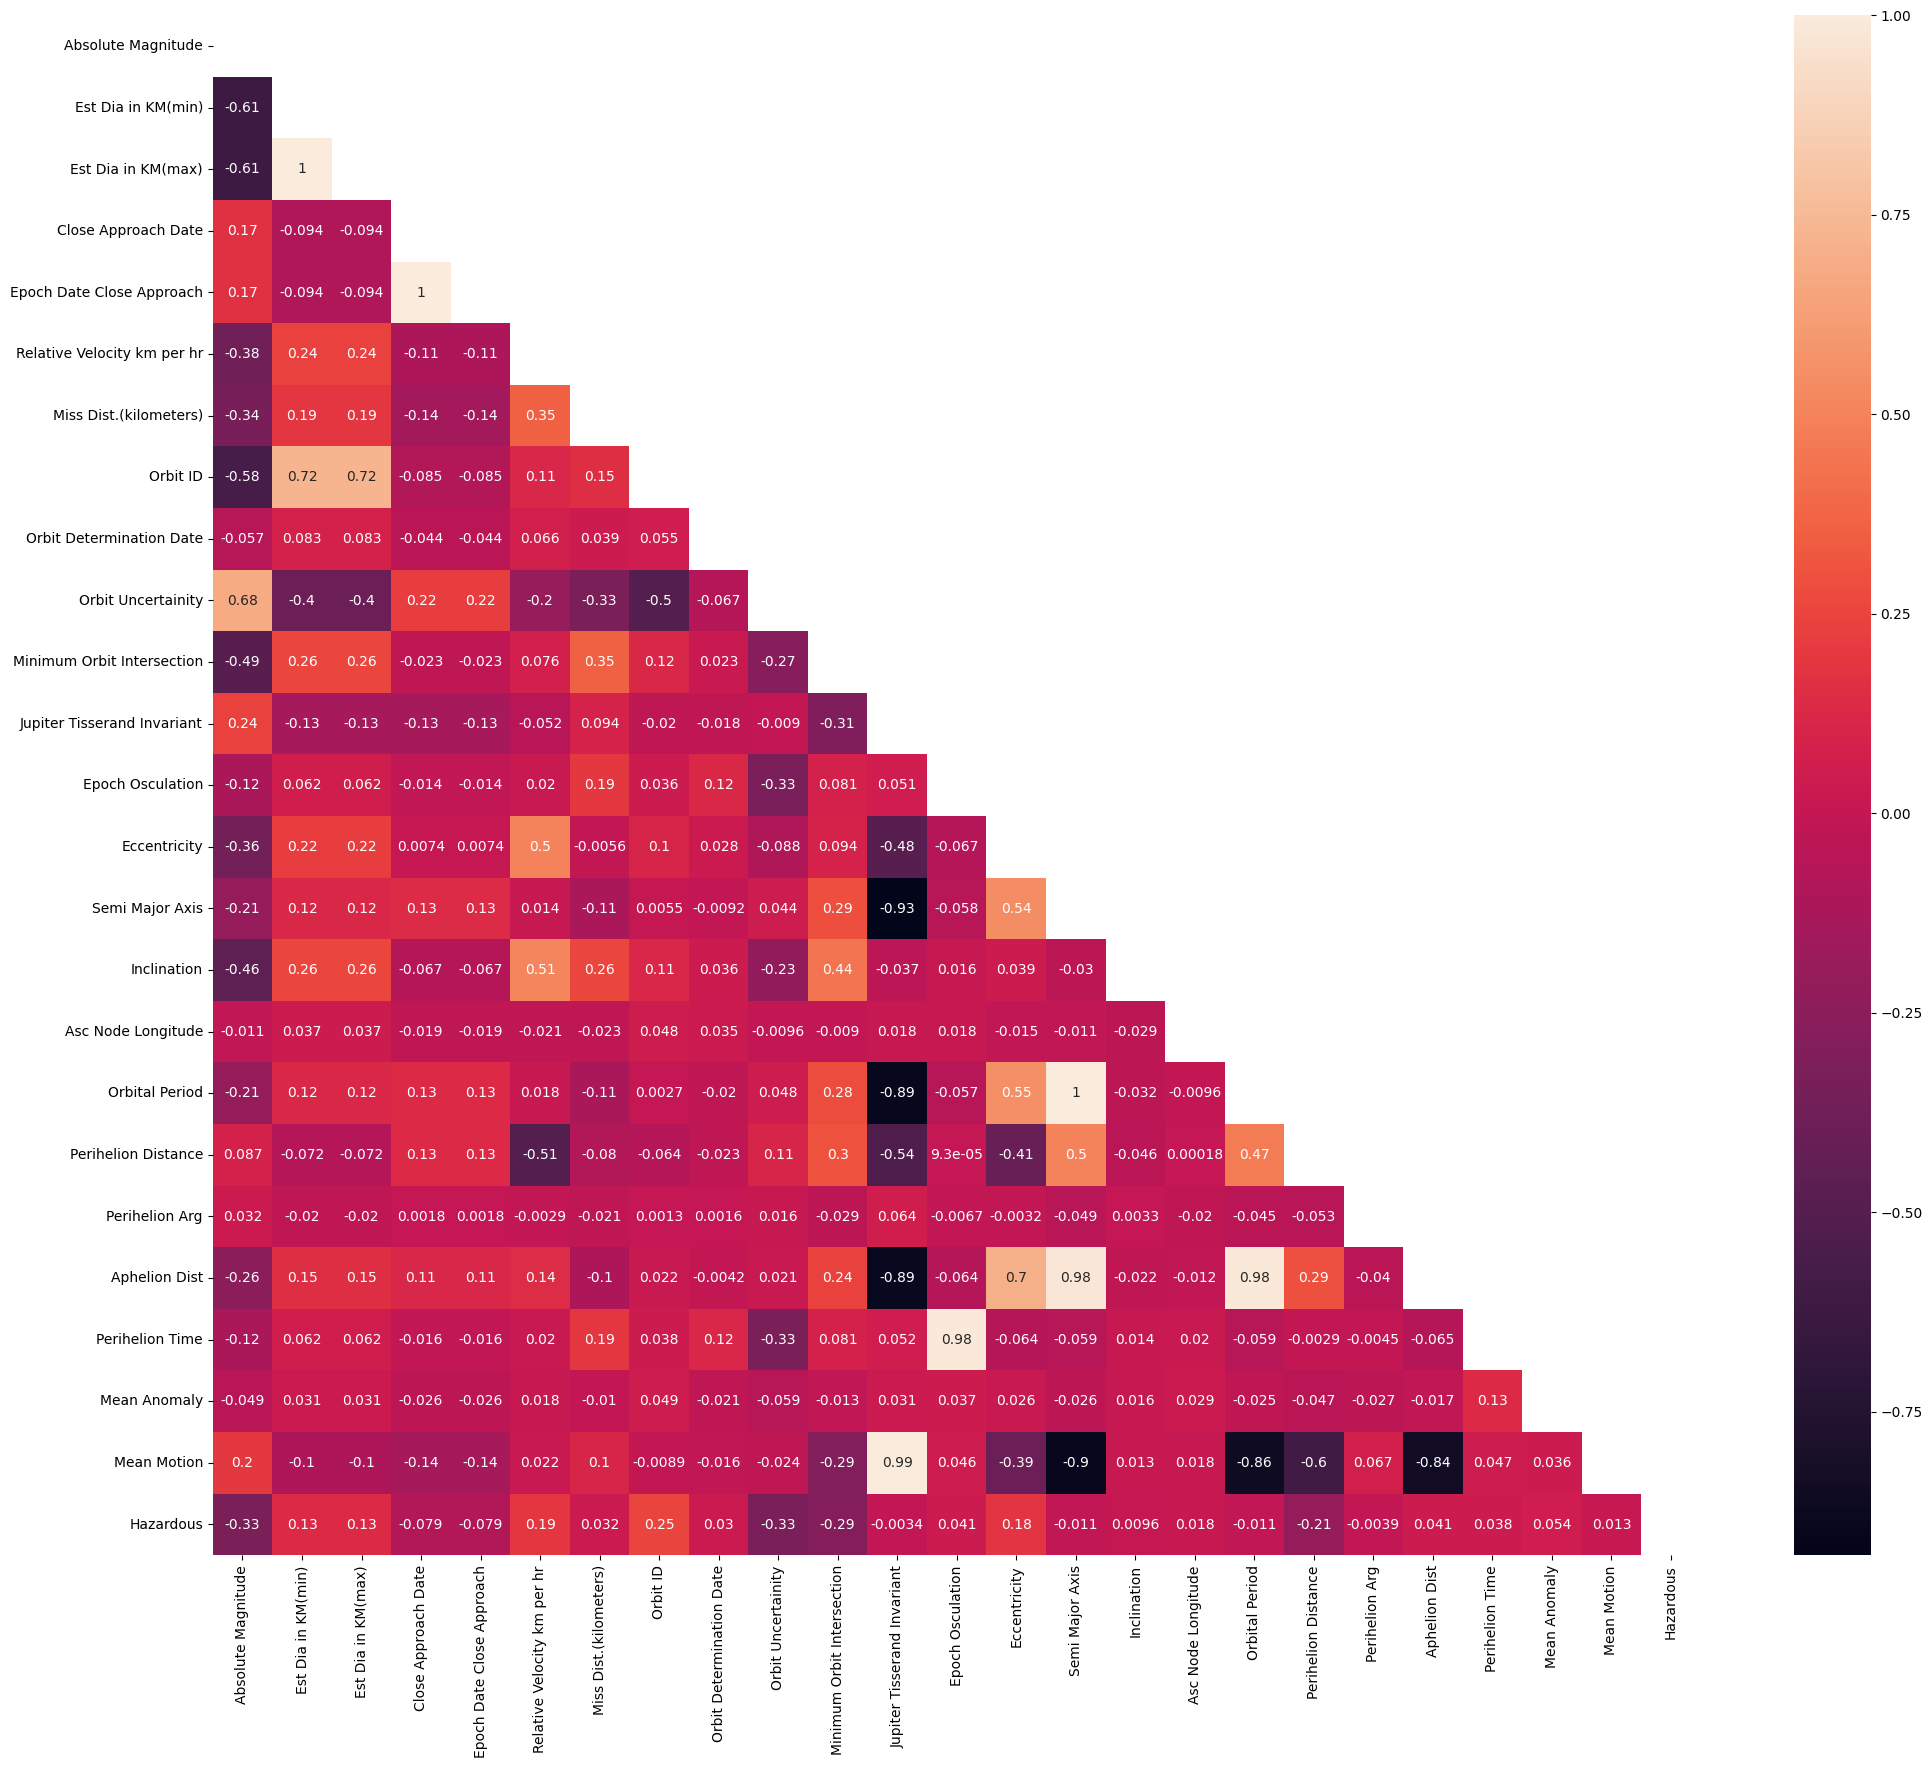

In [61]:
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype = 'bool'))
plt.subplots(figsize = (24, 20))
sns.heatmap(df_corr, annot = True, mask = mask)
plt.show()

In [76]:
x = df.drop(['Hazardous', 'Orbit Determination Date', 'Close Approach Date'], axis = 1)
y = df['Hazardous']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state = 42)

In [77]:
y_train.value_counts() # performing over sampling to balance both categories.

Hazardous
False    2544
True      502
Name: count, dtype: int64

In [84]:
# over sampling using SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [85]:
y_train.value_counts()

Hazardous
False    2544
True     2544
Name: count, dtype: int64

In [95]:
# scaling the values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [100]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [101]:
y_pred = gaussian.predict(x_test)

In [102]:
accuracy_score(y_test, y_pred)

0.9408897014015845

In [103]:
confusion_matrix(y_test, y_pred)

array([[1322,   66],
       [  31,  222]], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.95      0.96      1388
        True       0.77      0.88      0.82       253

    accuracy                           0.94      1641
   macro avg       0.87      0.91      0.89      1641
weighted avg       0.95      0.94      0.94      1641

